# TMDB dataset analysis 
### By Joel Utoware
Contents of this notebook:
* 1.0 Loading the dataframe
* 2.0 Preparing the dataframe
    * 2.1 Converting data types
    * 2.2 Null handling
    * 2.3 Checking for duplicates (Key Point 1)
* 3.0 Three visualisation
    * 3.1 Top 5 most rated movies and bottom five least rated movies
    * 3.2 Average revenue and budget per year for the comedy genre
    * 3.3 What year had the highest revenue for comedy genre
* 4.0 Additional key point
    * 4.1 Correlation matrix (Key Point 2)
    * 4.2 Pair plot for comedy genre (Key Point 3)
* 5.0 comparison of 2 movies

The key points about the data are spread through the notebook as they were discovered during the analysis process.

In [1]:
#import necesary modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import ast
import datetime

## 1.0 Loading the dataframe

In [2]:
#import dataset
df=pd.read_csv('TMDB_movies.csv')

In [3]:
#first five rows
df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## 2.0 Preparing the dataframe

### 2.1 Converting data types

In [4]:
def convert(row,key):
    '''Convert the list of dictionaries to a list of values by a chosen key'''
    
    row=ast.literal_eval(row)#ensures row is treated as a list and not string
    temp=[i[key] for i in row]
    temp.sort()#sort the list to be consistent in entire column
    return temp


In [5]:
df['genres'] =df['genres'].apply(lambda x: convert(x,'name'))
df['keywords'] = df['keywords'].apply(lambda x: convert(x,'name'))
df['production_companies'] = df['production_companies'].apply(lambda x: convert(x,'name'))
df['production_countries'] = df['production_countries'].apply(lambda x: convert(x,'name'))
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: convert(x,'name'))

In [6]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[3d, alien, alien planet, anti war, battle, cg...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Dune Entertainment, Ingenious Film Partners, ...","[United Kingdom, United States of America]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Action, Adventure, Fantasy]",http://disney.go.com/disneypictures/pirates/,285,"[aftercreditsstinger, afterlife, alliance, cal...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Jerry Bruckheimer Films, Second Mate Producti...",[United States of America],2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


<b>The list of dictionaries in certain columns are now just lists with the corresponding names.</b>

In [7]:
#display column names, number of non-null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

The columns: homepage, overview, run time, release date, tagline have null values. It is not required to have these except release date and runtime where there should be a value as they are important information. A movie does not need to have an overview, homepage or tagline to function.

### 2.2 Null handling

<Axes: >

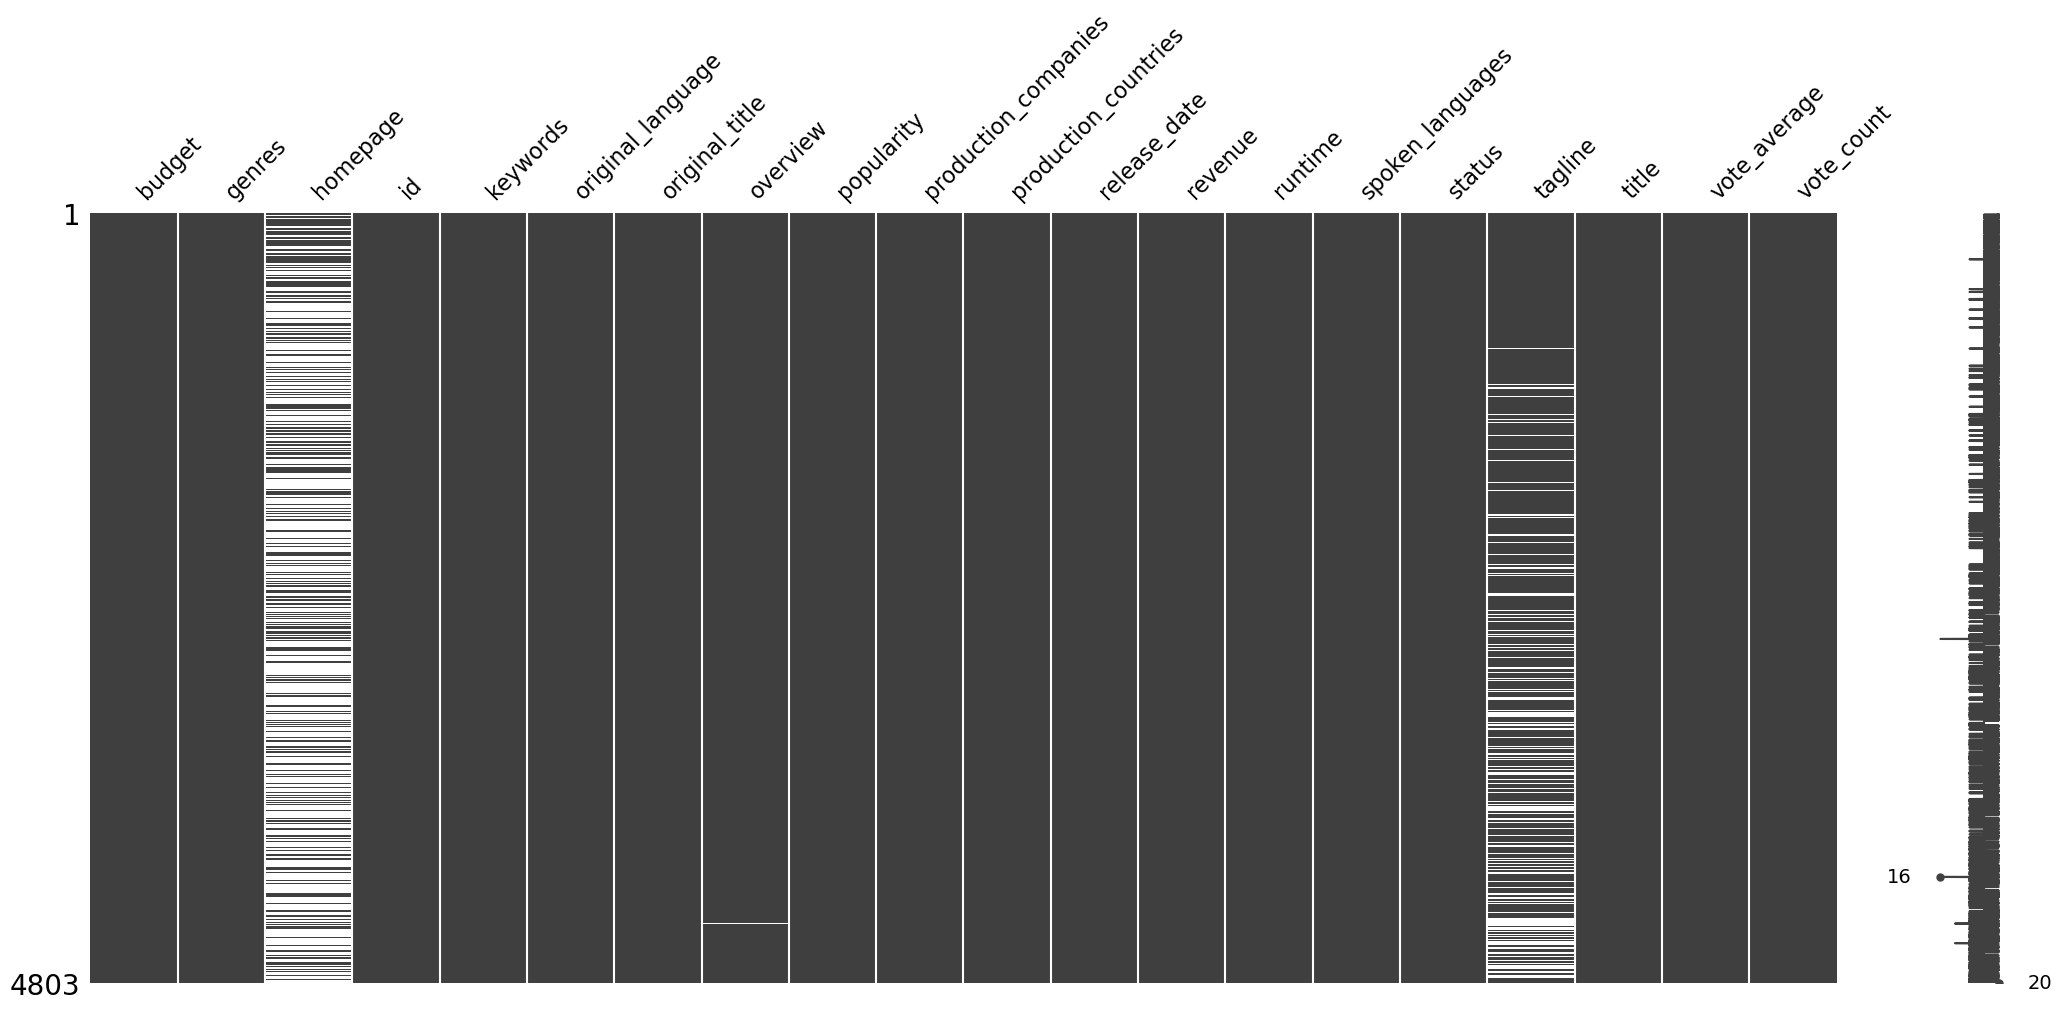

In [8]:
#matrix of null values
msno.matrix(df)

<b>Certain columns have null values as seen in the diagram above.</b>

In [9]:
#funtion taken from Digital Futures' Null_handling practice notebook
def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum() ## How many nulls in each column
    total_cnt = len(dataframe) ## Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) ## Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) ## Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False)

In [10]:
null_vals(df)#percentage of values in the column that are null

,null,percent
homepage,3091,64.356
tagline,844,17.572
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000


In [11]:
#drop columns with missing overview, release date and runtime due to low percentage
df.dropna(
    axis = 0, 
    how = 'any', 
    subset = ['overview', 'runtime','release_date'], 
    inplace = True 
)
#number of rows 
len(df)

4799

<b>Only 4 columns were removed, the 'dropna' function was used since there was a low percentage of null values.</b>

In [12]:
null_vals(df)

,null,percent
homepage,3087,64.326
tagline,840,17.504
budget,0,0.000
release_date,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000
runtime,0,0.000
revenue,0,0.000


Having a homepage or tagline is not needed for a movie, but we cannot remove the null values as there are too many and removing them would result in too much data being lost.Therefore, they will be replaced with the character 'X'.

In [13]:
#replace every null value with 'X'
df['tagline'].fillna(
    value = 'X', 
    method = None, 
    inplace = True 
)

df['homepage'].fillna(
    value = 'X', 
    method = None, 
    inplace = True 
)

In [14]:
null_vals(df)

,null,percent
budget,0,0.0
genres,0,0.0
vote_average,0,0.0
title,0,0.0
tagline,0,0.0
status,0,0.0
spoken_languages,0,0.0
runtime,0,0.0
revenue,0,0.0
release_date,0,0.0


<b>All null values have been handled.</b>

In [15]:
#changing the datartype to strings

df[['genres','keywords','production_companies',
    'production_countries','spoken_languages']]=df[['genres','keywords'
                                                    ,'production_companies','production_countries',
                                                    'spoken_languages']].astype('string')


### 2.3 Checking for duplicates (Key Point 1)

In [16]:
#check for duplicate rows
not_duplicated=df.drop_duplicates().copy()
len(not_duplicated)#no duplicates discovered

4799

In [17]:
#check for duplicated titles
movies=list(df.title)
strip_movies = [ (item.lower().replace(' ', '')) for item in movies]

In [18]:
for item in strip_movies: 
    if strip_movies.count(item) > 1: 
        print(item)

thehost
batman
thehost
outoftheblue
outoftheblue
batman


This is the first Key point discovered, although there are no duplicated rows, there are still movies with the same title. The names Batman, The Host and Out Of The Blue were repeated twice. There could be many reasons as to why this is the case, we will cover the most likely reason based either on observation or additional research.

In [19]:
df[df.title.str.lower().str.contains('the host')]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
972,44000000,"['Action', 'Adventure', 'Romance', 'Science Fi...",X,72710,"['alien invasion', 'alien parasites', 'based o...",en,The Host,A parasitic alien soul is injected into the bo...,42.933027,"['Chockstone Pictures', 'Nick Wechsler Product...",['United States of America'],2013-03-22,63327201,125.0,['English'],Released,You will be one of us,The Host,6.0,1817
2877,11000000,"['Drama', 'Horror', 'Science Fiction']",http://www.hostmovie.com/,1255,"['archer', 'bravery', 'daughter', 'family', 'f...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"['CJ Capital Investment', 'Cheongeoram', 'Cine...",['South Korea'],2006-07-27,88489643,119.0,['한국어/조선말'],Released,Monsters are real.,The Host,6.7,537


By looking at the 'production_countries' column, we can see that the movies were made in different countries (USA and South Korea) and have different genres.

In [20]:
df[df.title.str.lower().isin(['batman'])]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1359,35000000,"['Action', 'Fantasy']",X,268,"['chemical', 'crime fighter', 'dc comics', 'do...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"['PolyGram Filmed Entertainment', 'The Guber-P...","['United Kingdom', 'United States of America']",1989-06-23,411348924,126.0,"['English', 'Français']",Released,Have you ever danced with the devil in the pal...,Batman,7.0,2096
4267,1377800,"['Adventure', 'Comedy', 'Crime', 'Family', 'Sc...",X,2661,"['black cat', 'dc comics', 'missile', 'rescue'...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"['DC Comics', 'Greenlawn Productions', 'Twenti...",['United States of America'],1966-07-30,0,105.0,['English'],Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203


The Batman movies were made roughly 20 years apart, it is likely that at the time of making the 1989 version no one would mistake the title to be referring to the old one.

In [21]:
df[df.title.str.lower().str.contains('out of the blue')]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3647,0,['Drama'],X,39269,"['alcoholic father', 'coming of age', 'indepen...",en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,['Robson Street'],['Canada'],1980-05-01,0,94.0,['English'],Released,A harrowing drama from the director of Easy Rider,Out of the Blue,6.5,17
3693,0,['Drama'],X,10844,"['gun rampage', 'independent film', 'neighbor'...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],['New Zealand'],2006-10-12,0,103.0,['English'],Released,The true story of a small town massacre,Out of the Blue,5.9,18


According to [IMDb](https://www.imdb.com/title/tt0839938/) the 2006 version is based on the Aramoana Massacre which happened in 1990.

## 3.0 Three visualisations


### 3.1 Top 5 most rated movies and bottom five least rated movies

In [22]:
top5=df.sort_values(['vote_average','revenue'], ascending = [False,True]).head(5).copy()
bot5=df.sort_values(['vote_average','revenue'], ascending = [False,True]).tail(5).copy()
popularity= pd.concat([top5, bot5])

C:\Users\joelb\AppData\Local\Temp\ipykernel_10796\4071795726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'title',


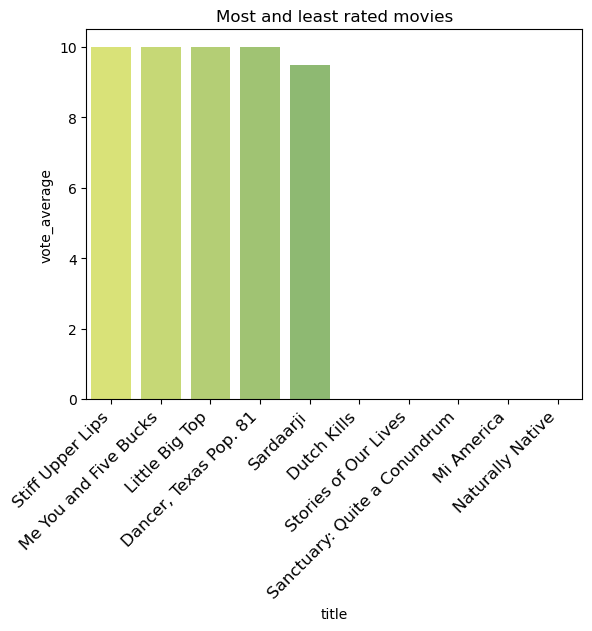

In [23]:
#plotting a bar chart for the vote_average movies
sns.barplot(x = 'title', 
            y = 'vote_average', 
            data = popularity,
            palette = 'summer_r'
           )
            
plt.xticks(rotation=45, 
           horizontalalignment = 'right', 
           fontweight = 'light',
           fontsize = 'large' 
          )

plt.title('Most and least rated movies')
plt.show()

This shows the highest vote average for each movie ordered by revenue when the vote average is the same. 

### 3.2 Average revenue and budget per year for the comedy genre

In [24]:
genre_list=df[(df.title=='Stiff Upper Lips')]['genres']
genre_list.head()

3519    ['Comedy']
Name: genres, dtype: string

The only genre listed in the most rated movie is 'Comedy'.

In [25]:
#get a dataframe with only movies that include the comedy genre
comedy_only=df[df['genres'].str.contains('Comedy')][['title','release_date','budget','revenue','popularity','vote_average','vote_count']].copy()

In [26]:
#set  release_date to datetime data type
comedy_only['release_date'] = pd.to_datetime(comedy_only['release_date'], format='%Y-%m-%d');
comedy_only.set_index('release_date', inplace=True)
comedy_only.sort_index(inplace=True)

In [27]:
yearly_average=comedy_only.resample('Y').mean( numeric_only=True)

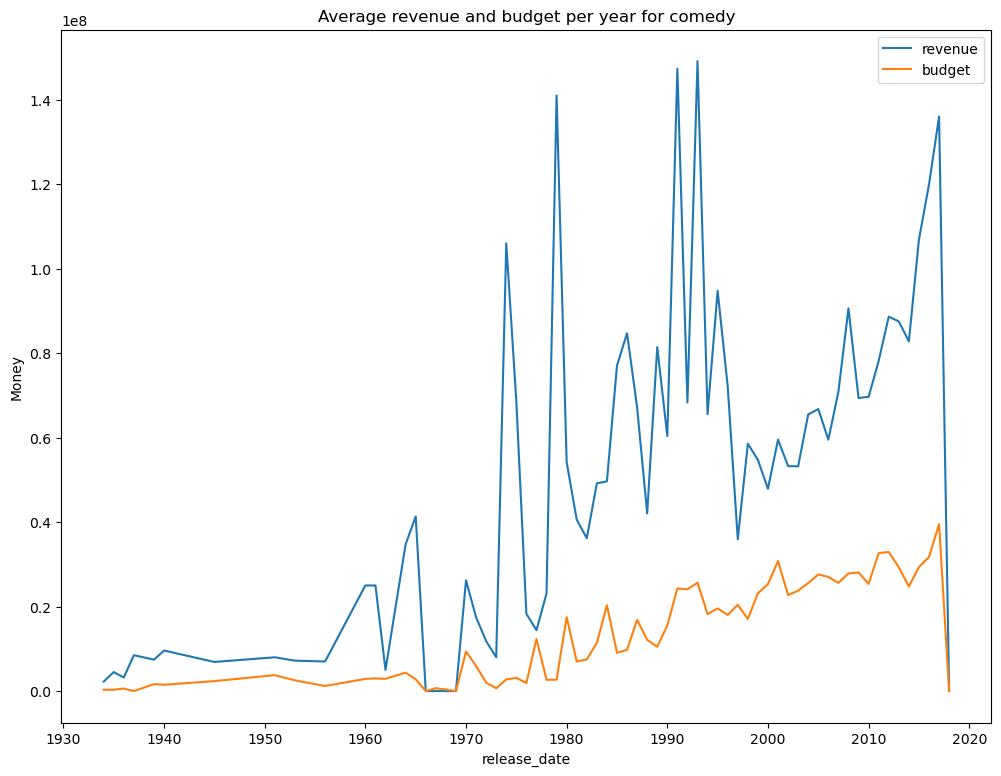

In [28]:
plt.figure(figsize=(12,9))

sns.lineplot(x='release_date',
             y='revenue',
             data=yearly_average,
             label='revenue'
)
sns.lineplot(x='release_date',
             y='budget',
             data=yearly_average,
             label='budget'
)
plt.ylabel('Money')
plt.title('Average revenue and budget per year for comedy')
plt.show()

Aside from a certain period between 1960 and 1970, the revenue is consistently higher than the budget each year for comedy movies. Which means there is potentially a positive correlation between them.

### 3.3 What year had the highest revenue for comedy genre

In [29]:
#revenue by top 5 years
most_revenue=yearly_average.sort_values('revenue', ascending = False).head(5).copy()
#most_revenue['year']=most_revenue.index.datetime.year
most_revenue['year'] = pd.DatetimeIndex(most_revenue.index).year

C:\Users\joelb\AppData\Local\Temp\ipykernel_10796\4132820591.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'year',


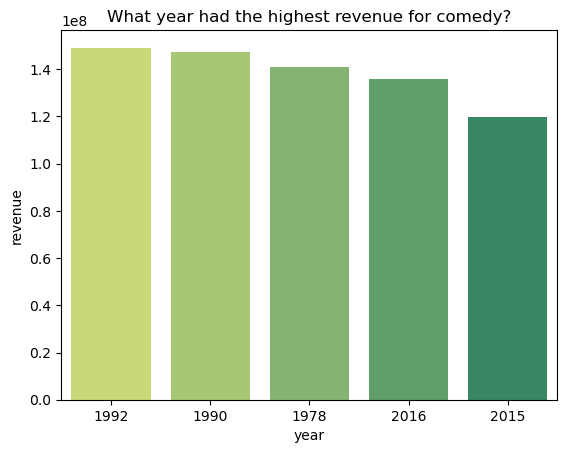

In [30]:
sns.barplot(x = 'year', 
            y = 'revenue', 
            data = most_revenue,
            palette = 'summer_r',
            order=most_revenue['year']
           )
plt.title('What year had the highest revenue for comedy?')
plt.show()

It is surprising to see that comedy movies in the 20th century had more revenue than the 21st century. This either means that less comedy movies were being made or that fewer people are spending money to watch comedy movies.

## 4.0 Additional key point

### 4.1 Correlation matrix (Key Point 2)

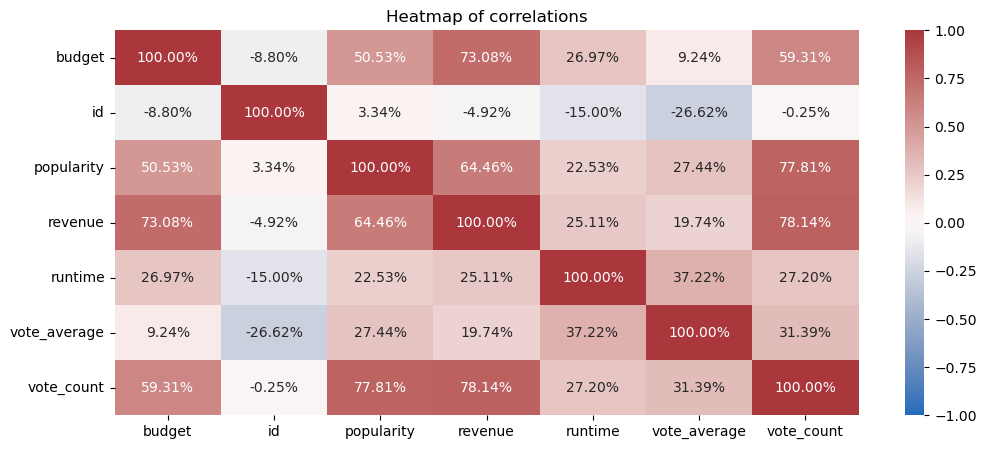

In [31]:
plt.figure(figsize = (12,5))
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
           cmap = 'vlag',
           fmt = '.2%',
           vmin=-1, 
            vmax=1)
plt.title('Heatmap of correlations')
plt.show()

A key point that can be taken from this diagram is that there is a positive correlation between the 'revenue' and 'budget'. This implies that the higher budget then the higher the revenue made. The line plot for the comedy genre further backs this point by showing that on average the revenue is always higher than the budget per year. 

The correlation matrix also shows that there is no correlation between the 'revenue' and 'vote average' which means that a high rated film does not result in a large amount of revenue being generated.

### 4.2 Pair plot for comedy genre (Key Point 3)

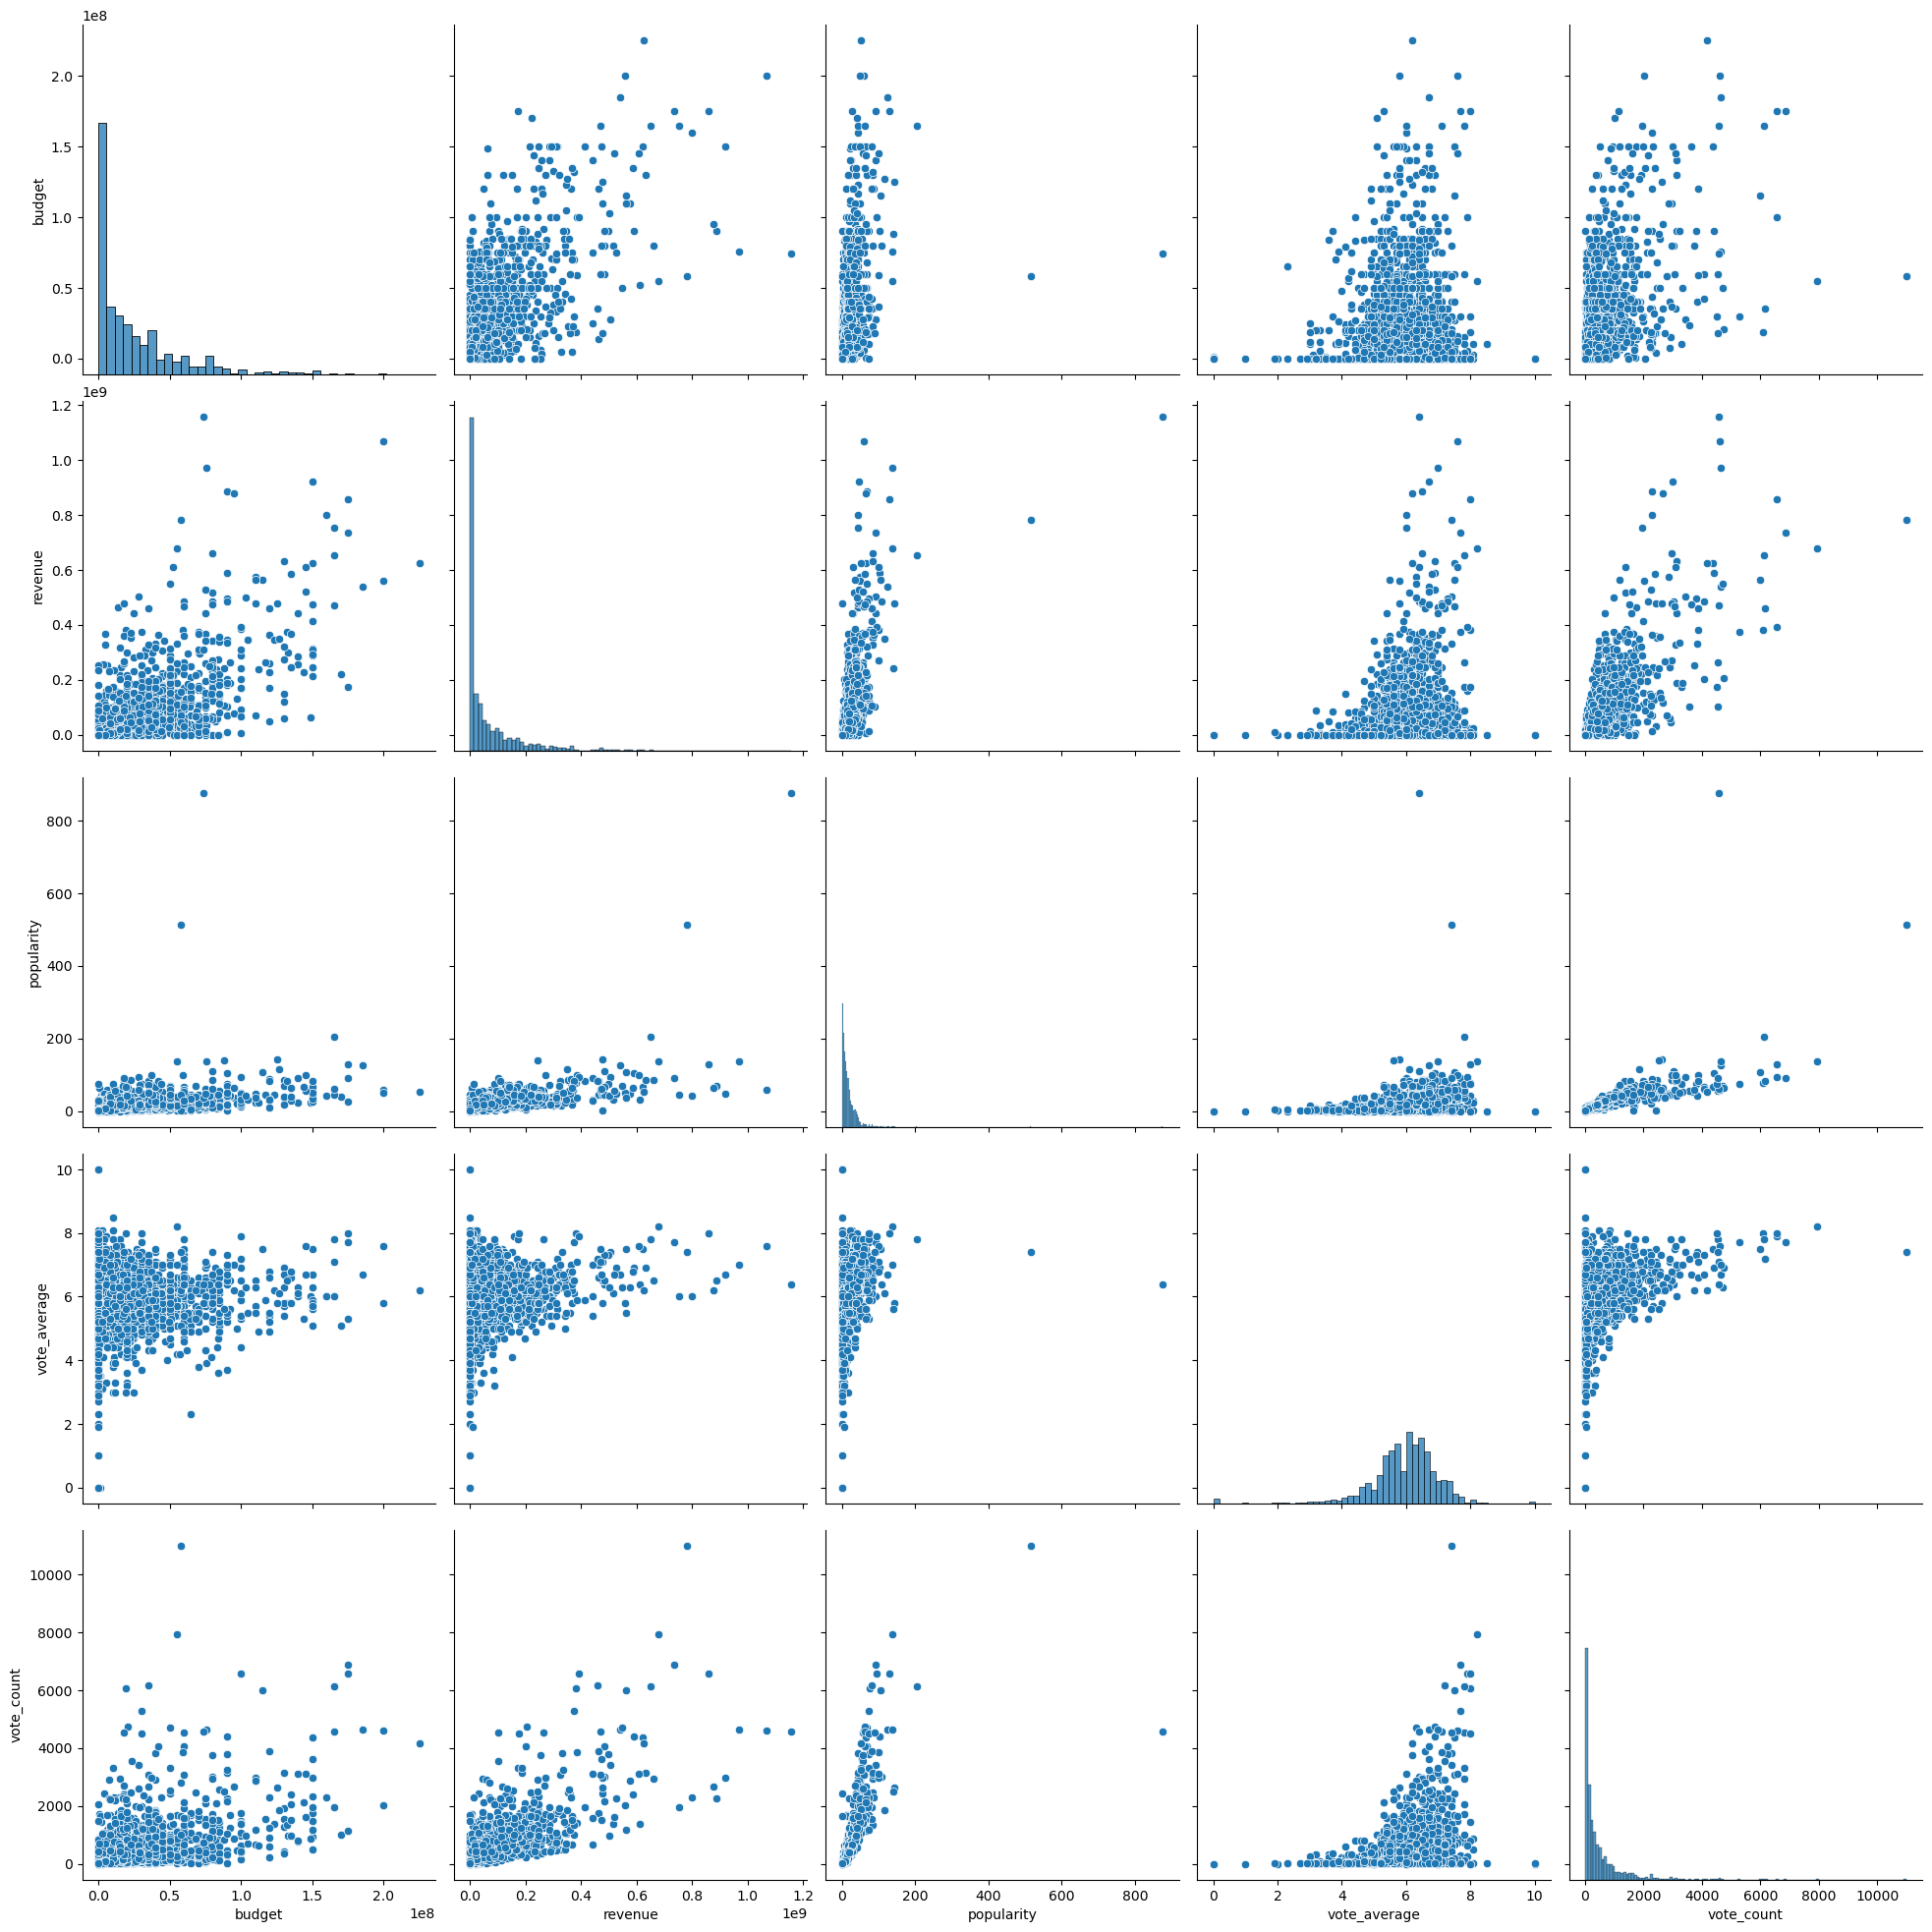

In [32]:
sns.pairplot(data = comedy_only,
             height = 4)
plt.show()

This pair plot helps visualise the correlations seen in the confusion matrix. Since this is  the dataframe for the comedy genre, it shows that even in extracted data, the correlation between columns is consistent. We can see that there is still a positive correlation between 'budget' and 'revenue' while there is still no correlation between the 'revenue' and 'vote average'.

## 5.0 Comparison of 2 movies

In [33]:
#get the movie from the year 1992 with the highest revenue 
best_year=comedy_only.copy()
best_year=best_year.loc['1992']
best_year=best_year.sort_values('revenue', ascending = False).head(1)
movie_1992=best_year['title']
movie_1992

release_date
1992-11-25    Aladdin
Name: title, dtype: object

C:\Users\joelb\AppData\Local\Temp\ipykernel_10796\4146343952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title',


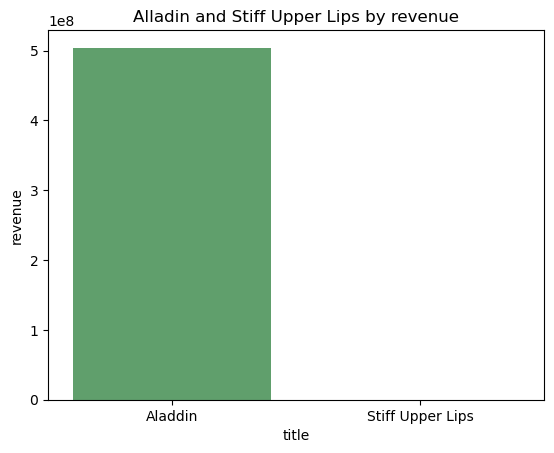

In [34]:
#compare Alladin with Stiff Upper Lips
comparison=df[(df['title']=='Aladdin') |(df['title']=='Stiff Upper Lips')]
sns.barplot(x='title',
            y='revenue',
            data=comparison,
            palette='summer'   
)
plt.title('Alladin and Stiff Upper Lips by revenue')
plt.show()

In [35]:
comparison.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1695,28000000,"['Adventure', 'Animation', 'Comedy', 'Family',...",http://movies.disney.com/aladdin,812,"['aftercreditsstinger', 'animal sidekick', 'an...",en,Aladdin,Princess Jasmine grows tired of being forced t...,92.982009,['Walt Disney Pictures'],['United States of America'],1992-11-25,504050219,90.0,['English'],Released,Wish granted!,Aladdin,7.4,3416
3519,0,['Comedy'],X,89861,"['italy', 'victorian england', 'young woman']",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"['India', 'United Kingdom']",1998-06-12,0,99.0,['English'],Released,X,Stiff Upper Lips,10.0,1


These 2 movies were selected because it is comparing the highest rated film to the film from the same genre that made the most revenue. The highest rated film  did not have any revenue made compared to the Aladdin movie. Upon further investigation, there was no revenue  made at all due to only having 1 view count. 

This relates to the correlation matrix as the 'vote average' has no correlation to the 'revenue', however there is a correlation between revenue and the view count. Therefore, explaining why there is a low value. Moving forward, it would be good to not use the 'vote_average' for analysis, as it can be easily skewed by low vote counts. 